In [34]:
import tensorflow as tf
import os
from IPython.display import Image 

In [2]:
def _parse_function(record):
  features = tf.parse_single_example(
      record,
      # Defaults are not specified since both keys are required.
      features={
          'image/encoded': tf.FixedLenFeature([], tf.string),
          'image/height': tf.FixedLenFeature([], tf.int64),
          'image/width': tf.FixedLenFeature([], tf.int64)
      })
  image = tf.decode_raw(features['image/encoded'], tf.uint8)
  height = tf.cast(features['image/height'], tf.int32)
  width = tf.cast(features['image/width'], tf.int32)
  return image, height, width

In [48]:
train_path = 'training/data/coco_train.record'
# Create the Dataset object.
ds = tf.data.TFRecordDataset(train_path)
# Map features and labels with the parse function.
ds = ds.map(_parse_function)

In [49]:
# Make a one shot iterator
n = ds.make_one_shot_iterator().get_next()
sess = tf.Session()

In [50]:
sum(1 for _ in tf.python_io.tf_record_iterator(train_path))

12251

In [65]:
value=sess.run(n)

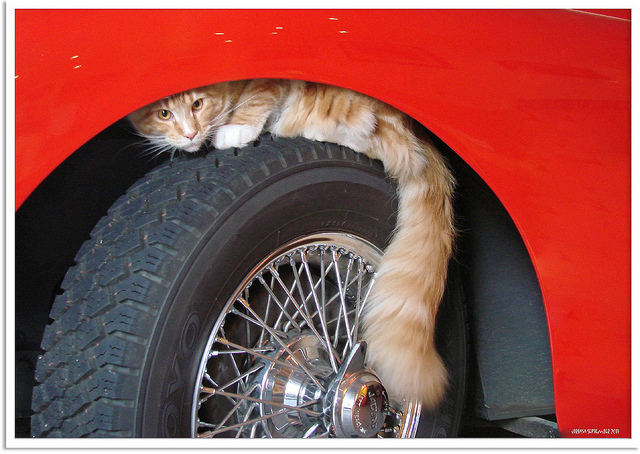

In [66]:
Image(value[0])